# draw traveling path in the restricted area

In [1]:
%pwd

'/home/jovyan/notebooks'

In [2]:
%cd /home/jovyan/data/raw

/home/jovyan/data/raw


## make a video from image oct 25 with a restricted area

In [14]:
%pwd

'/home/jovyan/data/raw'

In [15]:
%cd /home/jovyan/500GBstorage/Oct_25/images/

/home/jovyan/500GBstorage/Oct_25/images


In [16]:
import shutil
shutil.rmtree('/home/jovyan/500GBstorage/Oct_25/images/.ipynb_checkpoints', ignore_errors=True)

In [17]:
path="/home/jovyan/500GBstorage/Oct_25/images/"
#makes video in sequence from the image frames 
import os
import cv2
import numpy as np 
import glob 
from PIL import Image 

img_array=[]

#Using sort to make the video in sequence
# for filename in sorted(os.listdir(path), key=lambda s: s[5:10]):

for filename in glob.glob("/home/jovyan/500GBstorage/Oct_25/images/*.png"):
    # print(filename)
    img=cv2.imread(os.path.join(path, filename))
    
    # Draw a rectangle with blue line borders of thickness of 1.5 px
    img2= cv2.rectangle(img, (0, 0), (100, 150),(255,0, 0), 1.5)
    
    # print(img.shape)
    height, width, layers= img.shape
    size=(width,height)
    img_array.append(img2)
    
# named the generated video    
video = cv2.VideoWriter("Oct25.avi",cv2.VideoWriter_fourcc(*'MJPG'),3,size)
#appending the images to the video one by one
for image in img: 
    video.write(image)
    
for i in range(len(img_array)):
    video.write(img_array[i])
    #relase and destroy all windows 
video.release()

## Yolov5_StrongSORT_OSNet

In [18]:
cd /home/jovyan/500GBstorage/new-strongsort/Yolov5_StrongSORT_OSNet

/home/jovyan/500GBstorage/new-strongsort/Yolov5_StrongSORT_OSNet


In [19]:
# !pip install -r requirements.txt

## 
save the Oct25.avi video in the same directory 

## Yolov5_StrongSORT_OSNet object tracking for the video

In [20]:
# !python3 track.py --source 'Oct25.avi' --classes 0 --save-txt --conf-thres 0.3 --iou-thres 0.3 --save-vid --yolo-weights 'yolov5l6.pt'

In [21]:
# import pandas as pd
# from collections import defaultdict
df=pd.read_csv("/home/jovyan/500GBstorage/new-strongsort/Yolov5_StrongSORT_OSNet/runs/track/exp9/tracks/Oct25.txt", header=None, delim_whitespace=True, names='frame_idx id bbox_left bbox_top bbox_w bbox_h -1a -1b -1c i'.split(' '))
# add gesture as a column 
df['gesture'] = pd.Series(random.choices(['standing','sitting','running','fighting'], weights= [19,70,10,1], k= len(df)))
df.head(4)

,frame_idx,id,bbox_left,bbox_top,bbox_w,bbox_h,-1a,-1b,-1c,i,gesture
0,2,1,183,162,57,63,-1,-1,-1,0,sitting
1,2,2,76,218,43,21,-1,-1,-1,0,sitting
2,2,3,35,29,18,52,-1,-1,-1,0,sitting
3,3,1,182,165,58,60,-1,-1,-1,0,running


## define the ids in restricted area + set alarm

In [22]:
list=[]
for i in range(len(df["bbox_left"])): 
    if (df["bbox_left"][i]+df["bbox_w"][i])/2< 100 and (df["bbox_top"][i]+df["bbox_h"][i])/2< 150:
        list.append("alert")
    else:
        list.append(False)
        
df["restricted_area"]= list
df.head()

,frame_idx,id,bbox_left,bbox_top,bbox_w,bbox_h,-1a,-1b,-1c,i,gesture,restricted_area
0,2,1,183,162,57,63,-1,-1,-1,0,sitting,False
1,2,2,76,218,43,21,-1,-1,-1,0,sitting,alert
2,2,3,35,29,18,52,-1,-1,-1,0,sitting,alert
3,3,1,182,165,58,60,-1,-1,-1,0,running,False
4,3,2,79,218,38,21,-1,-1,-1,0,sitting,alert


In [23]:
df["restricted_area"].unique()
df_restrict = df[df["restricted_area"]== "alert"]
df_restrict.head()

,frame_idx,id,bbox_left,bbox_top,bbox_w,bbox_h,-1a,-1b,-1c,i,gesture,restricted_area
1,2,2,76,218,43,21,-1,-1,-1,0,sitting,alert
2,2,3,35,29,18,52,-1,-1,-1,0,sitting,alert
4,3,2,79,218,38,21,-1,-1,-1,0,sitting,alert
5,3,3,35,30,18,52,-1,-1,-1,0,running,alert
7,4,2,78,217,40,22,-1,-1,-1,0,sitting,alert


In [24]:
df_restrict.iloc[1]["bbox_left"]

35

In [25]:
## count no.of times a person is in frame_idx
# df_restrict["id"].value_counts()
# No_frames = [df_restrict["id"].value_counts()]
time_spend =pd.DataFrame([df_restrict["id"].value_counts()]).T
time_spend = time_spend.rename_axis('no_frames').reset_index()
time_spend.head()

,no_frames,id
0,2,51
1,10,32
2,5,14
3,30,11
4,3,10


## Calculate the time ids spent in the restricted area

In [26]:
## Calculate the time spend 
time_sec = time_spend['id'] * time_spend['no_frames']
# assuning each frame is 30 second 
time_spend['time_min'] = time_sec / 30
time_spend. head()

,no_frames,id,time_min
0,2,51,3.400000
1,10,32,10.666667
2,5,14,2.333333
3,30,11,11.000000
4,3,10,1.000000


In [27]:
time_spend.loc[time_spend['id']==51,'time_min']

0    3.4
Name: time_min, dtype: float64

## Draw travelling path for ids 

In [28]:
!pip install imutils


[notice] A new release of pip available: 22.2 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [29]:
%matplotlib inline 
import cv2
import imutils
import matplotlib.pyplot as plt

#read the video from stronsort runs
cap = cv2.VideoCapture("/home/jovyan/500GBstorage/new-strongsort/Yolov5_StrongSORT_OSNet/runs/track/exp9/Oct25.mp4")

j=0
frames = []
while True:
    ret, frame = cap.read()
    j =j+1
    # print(j)
    #print(ret)
    
    frames.append(frame)
    # plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    # plt.show()
    if not ret:
        break

In [30]:
print(len(frames))

103


In [31]:
from collections import defaultdict

rects = []
lst = lambda:list(range (0,5))
cent = defaultdict(lst)

obj_id_list = []
obj_id =  df_restrict["id"]

for i in range(len(df_restrict['bbox_left'])):
    bbox = df_restrict[i:i+1][2:6]
    rects.append(bbox)

    ## draw the center of each bbox
    cx= ((df_restrict.iloc[i]["bbox_left"]+df_restrict.iloc[i]["bbox_w"])/2.0).astype(int)      
    cy = ((df_restrict.iloc[i]["bbox_top"]+df_restrict.iloc[i]["bbox_h"])/2.0).astype(int)
    print(df_restrict.iloc[i]["frame_idx"])
    cv2.circle(frames[df_restrict.iloc[i]["frame_idx"]], (cx,cy), 4,(0,255,0), -1)

    ## if the person shows up for the first time in the zone

    if obj_id.iloc[i] in cent:
        cent[obj_id.iloc[i]].append((cx,cy))
    else:
        cent[obj_id.iloc[i]]=[(cx,cy)]

    if obj_id not in obj_id_list:
        obj_id_list.append(obj_id)
        start_pt = (cx, cy)
        end_pt = (cx, cy)
        cv2.line(frames[df_restrict.iloc[i]["frame_idx"]], start_pt, end_pt, (0,255,0),2)

    ## for the senond frame
    else:
        l = len(cent[obj_id.iloc[i]])
        for pt in range(len(cent[obj_id.iloc[i]])):
            if not pt+1 == l:
                start_pt= cent[obj_id.iloc[i]][pt][0],cent[obj_id.iloc[i]][pt][1]
                end_pt = cent[obj_id.iloc[i]][pt+1][0],cent[obj_id.iloc[i]][pt+1][1]
                cv2.line(frames[df_restrict.iloc[i]["frame_idx"]], start_pt, end_pt, (0,255,0),2)


    cv2.rectangle(frames[df_restrict.iloc[i]["frame_idx"]], (df_restrict.iloc[i]["bbox_left"], df_restrict.iloc[i]["bbox_top"]), (df_restrict.iloc[i]["bbox_w"], df_restrict.iloc[i]["bbox_h"]), (0, 0, 255), 2)
    text = "ID: {}".format(obj_id.iloc[i], time_spend['time_min'])
    cv2.putText(frames[df_restrict.iloc[i]["frame_idx"]], text, (0, 100), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 1)

cap.release()
cv2.destroyAllWindows() 

2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
13
14
15
16
17
18
19
19
20
20
20
21
21
21
22
22
23
23
24
24
24
25
25
25
26
26
26
27
27
28
28
29
29
30
30
31
32
33
34
34
34
35
35
36
36
36
37
37
38
38
39
39
39
40
40
41
41
42
42
43
43
44
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
53
54
54
55
55
56
57
58
59
60
61
62
63
65
65
66
66
67
68
69
70
70
70
71
71
71
71
72
72
73
74
75
76
77
78
79
80
81
82
82
83
86
87
88
89
94
94
95
95
96
97
98
99
99
100
101
102


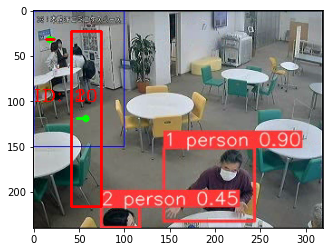

In [74]:
plt.imshow(cv2.cvtColor(frames[30], cv2.COLOR_BGR2RGB))
plt.show()

In [58]:
# for frame in frames:
#     print(frame.shape)
print(len(frames))
for ii, frame in enumerate(frames):
    print(ii, frame.shape)

103
0 (240, 320, 3)
1 (240, 320, 3)
2 (240, 320, 3)
3 (240, 320, 3)
4 (240, 320, 3)
5 (240, 320, 3)
6 (240, 320, 3)
7 (240, 320, 3)
8 (240, 320, 3)
9 (240, 320, 3)
10 (240, 320, 3)
11 (240, 320, 3)
12 (240, 320, 3)
13 (240, 320, 3)
14 (240, 320, 3)
15 (240, 320, 3)
16 (240, 320, 3)
17 (240, 320, 3)
18 (240, 320, 3)
19 (240, 320, 3)
20 (240, 320, 3)
21 (240, 320, 3)
22 (240, 320, 3)
23 (240, 320, 3)
24 (240, 320, 3)
25 (240, 320, 3)
26 (240, 320, 3)
27 (240, 320, 3)
28 (240, 320, 3)
29 (240, 320, 3)
30 (240, 320, 3)
31 (240, 320, 3)
32 (240, 320, 3)
33 (240, 320, 3)
34 (240, 320, 3)
35 (240, 320, 3)
36 (240, 320, 3)
37 (240, 320, 3)
38 (240, 320, 3)
39 (240, 320, 3)
40 (240, 320, 3)
41 (240, 320, 3)
42 (240, 320, 3)
43 (240, 320, 3)
44 (240, 320, 3)
45 (240, 320, 3)
46 (240, 320, 3)
47 (240, 320, 3)
48 (240, 320, 3)
49 (240, 320, 3)
50 (240, 320, 3)
51 (240, 320, 3)
52 (240, 320, 3)
53 (240, 320, 3)
54 (240, 320, 3)
55 (240, 320, 3)
56 (240, 320, 3)
57 (240, 320, 3)
58 (240, 320, 3)
59 

AttributeError: 'NoneType' object has no attribute 'shape'

## display the video with travel path

In [33]:
# %cd "/home/jovyan/500GBstorage/new-strongsort/Yolov5_StrongSORT_OSNet/runs/track/exp9/Oct25.mp4"

In [34]:
pwd

'/home/jovyan/500GBstorage/new-strongsort/Yolov5_StrongSORT_OSNet'

In [61]:
# #https://chat.openai.com/chat
# Read video frm frames

import cv2

# Define the frames
# frames = [cv2.imread(f"frame{i}.jpg") for i in range(104)]

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*"XVID")
out = cv2.VideoWriter("output.avi", fourcc, 10.0, (320, 240))

# Write the frames to the video file
for frame in frames[:100]:
    out.write(frame)
    
cv2.destroyAllWindows()     
# Release the VideoWriter object
out.release()

In [62]:
# 500GBstorage/new-strongsort/Yolov5_StrongSORT_OSNet/output.avi
!ffmpeg -i /home/jovyan/500GBstorage/new-strongsort/Yolov5_StrongSORT_OSNet/output.avi -vf fps=2 -vcodec libx264 /home/jovyan/500GBstorage/new-strongsort/Yolov5_StrongSORT_OSNet/output.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [63]:
# ## to display the video

from IPython.display import HTML
from base64 import b64encode
mp4 = open('output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
# """ % data_url)